# seaborn 패키지

- https://seaborn.pydata.org/
- matplotlib의 기능에 스타일을 확장한 파이썬 시각화 도구
- 패키지는 설치해야 함(pip install seaborn)
    - 아나콘다 내부에는 이미 설치되어 있음
- seaborn을 사용하기 위해서는 matplotlib가 import 되어 있어야 함

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# seaborn 패키지 임포트
import seaborn as sns

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

**데이터 생성**

In [5]:
# 예제 데이터
x=np.linspace(1,14,100) #1부터 14까지의 범위에서 동일 간격의 숫자 100개 생성
x
y1=np.sin(x)
y2=2*np.sin(x)
y3=3*np.sin(x)
y4=4*np.sin(x)

**matplotlib.pyplot.plot()을 이용하여 라인플롯 그리기**

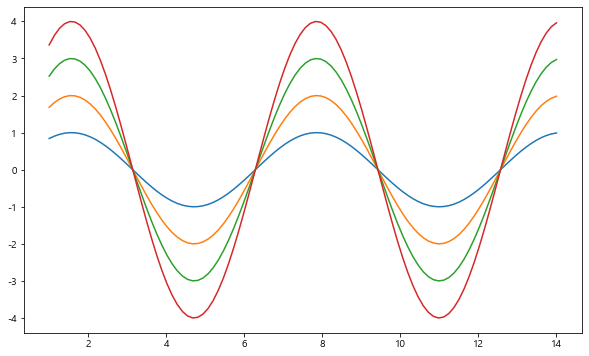

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

**seaborn의 set_style() 이용하여 라인플롯 그리기**

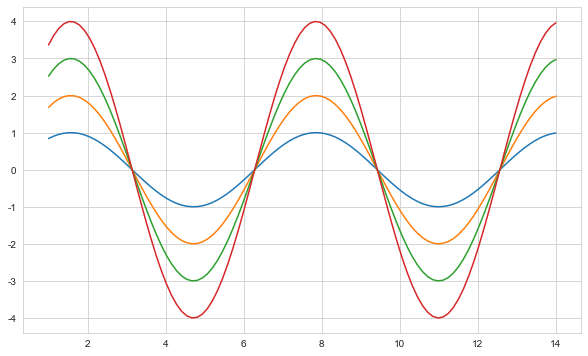

In [7]:
sns.set_style('whitegrid') # 흰색 배경에 grid가 추가된 스타일

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

**sns.despine() 함수를 이용한 그림 테두리 제거**

: sns.despine(right=True,left=True,top=False,bottom=False)

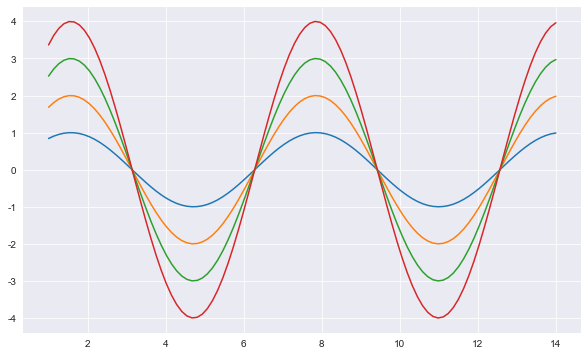

In [8]:
sns.set_style('darkgrid') 
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
sns.despine(right=True,left=True) # top=True 기본 속성 값 
plt.show()

#### 예. 시계열 데이터에 대한 라인 플롯 그리기

In [9]:
# 예제 데이터 생성 : 날짜 인덱스를 갖는 시계열 데이터
np.random.seed(123)
index = pd.date_range("1 1 2010",periods=100, freq="m", name="Date")
data = np.random.randn(100, 4).cumsum(axis=0)
df = pd.DataFrame(data, index, ['a', 'b', 'c', 'd'])
df.shape

(100, 4)

**1) matplotlib의 plot()을 이용하여 라인플롯 그리기**

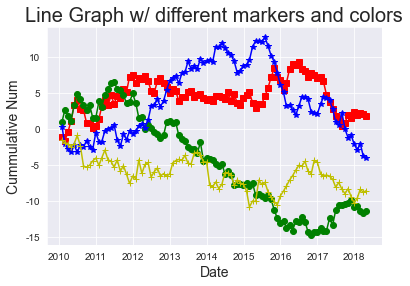

In [11]:
# Line Graph by matplotlib with DataFrame
plt.plot(df.index, df.a, marker='s', color='r')
plt.plot(df.index, df.b, marker='o', color='g')
plt.plot(df.index, df.c, marker='*', color='b')
plt.plot(df.index, df.d, marker='+', color='y')
plt.title('Line Graph w/ different markers and colors', fontsize=20) 
plt.ylabel('Cummulative Num', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

**2) seaborn의 lineplot()을 이용하여 라인플롯 그리기**

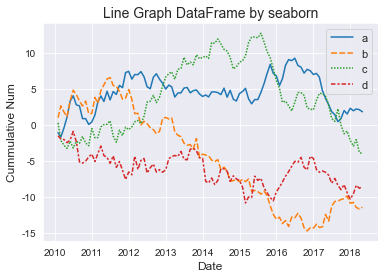

In [12]:
# Line graph by seaborn

ax = sns.lineplot(data=df)
plt.title('Line Graph DataFrame by seaborn', fontsize=14)
plt.ylabel('Cummulative Num', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.show()

**3) pandas.DataFrame.plot(kind='line')를 이용하여 라인플롯 그리기**

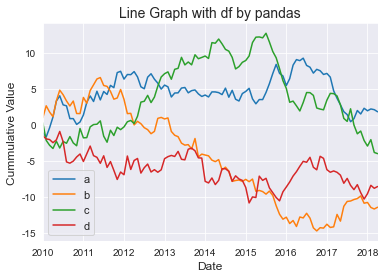

In [13]:
df.plot.line()
plt.title('Line Graph with df by pandas', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cummulative Value', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.show()

### sns 의 기본 데이터 셋 : tips 활용
- 요일별 점심 저녁 식사 금액과 팁을 정리한 데이터 셋
- 성별, 흡연여부가 구별되어 있음
- 패키지명.load_dataset(데이터셋명)

In [14]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 상자그림(boxplot)

- 연속형 데이터의 분포를 시각화
- 이상치 확인
- 좌우대칭, 비대칭 등 분포의 모양 확인

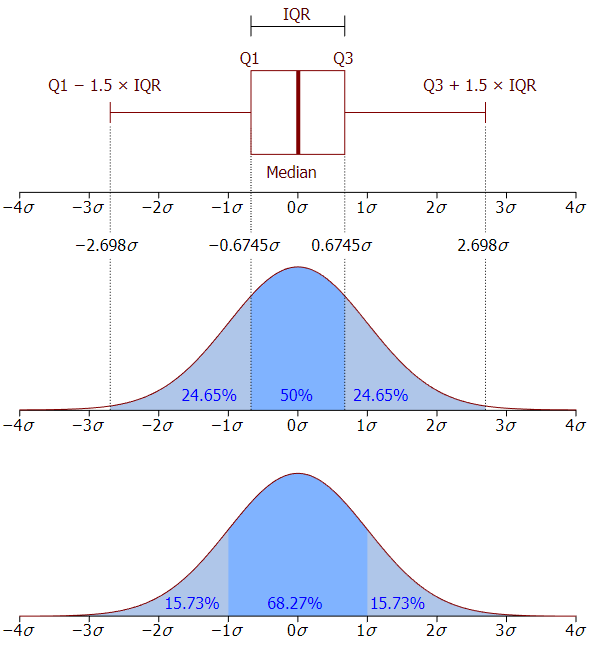

-출처: https://rfriend.tistory.com/410?category=675918

### 1) matplotlib의 boxplot()을 이용하여 상자그림표 그리기

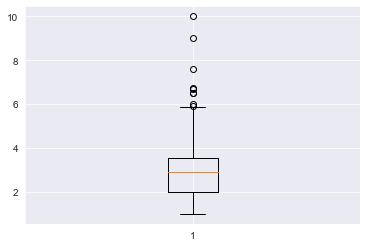

In [15]:
# Basic box plot
plt.boxplot(tips['tip'])
plt.show()

**matplotlib.boxplot()의 sym인수를 이용하여 이상치(outlier) 모양과 색깔 지정**
- 제목(title), X축 이름(X label)을 설정

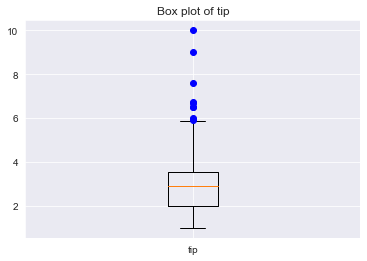

In [16]:
# setting outlier symbol, title, xlabel

plt.boxplot(tips['tip'], sym="bo")
plt.title('Box plot of tip')
plt.xticks([1], ['tip'])
plt.show()

**matplotlib.boxplot()에서 여러 개 상자그림 그리기**

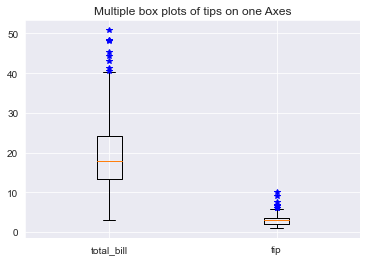

In [17]:
# Multiple box plots on one Axes

fig, ax = plt.subplots()
ax.boxplot([tips['total_bill'], tips['tip']], sym="b*")
plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2],
           ['total_bill', 'tip'])
plt.show()

### 2) seaborn의 boxplot()을 이용하여 상자그림 그리기

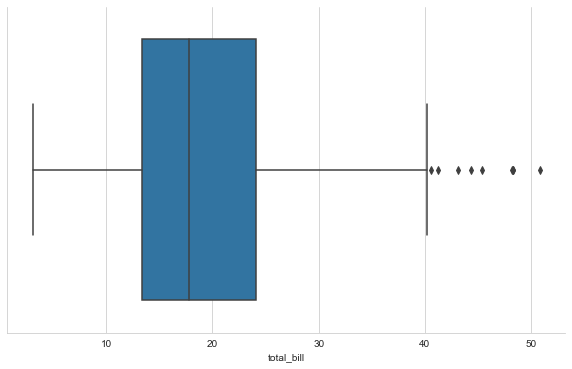

In [18]:
#tips 데이터를 이용한 box plot 그리기1
# seaborn 패키지의 boxplot() 이용해서 그리기

sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.boxplot(x=tips['total_bill'])
sns.despine()
plt.show()

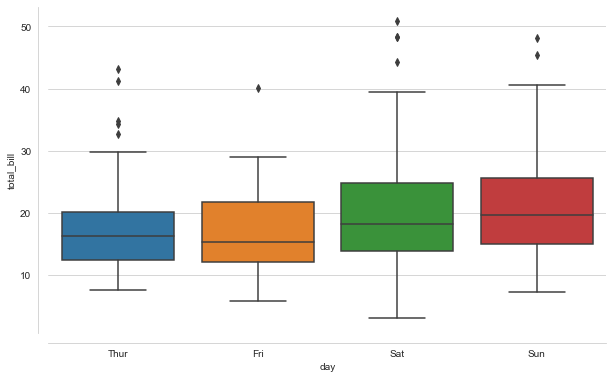

In [19]:
# tips 데이터를 이용한 box plot 그리기2
# 요일별 영수증 금액의 분포 확인

sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.boxplot(x=tips['day'],y=tips['total_bill'])

# offset x,y축의 간격을 설정하는 인수
sns.despine(offset=10)
plt.show()

**sns.boxplot의 hue인수 이용하여 범주별 박스플롯 그리기**

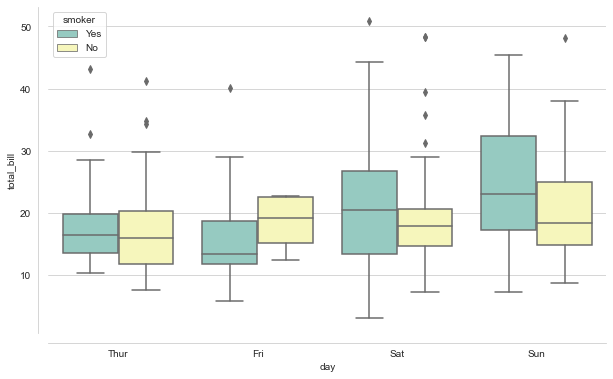

In [20]:
# hue 인수 : 카테고리값을 가지는 변수의 이름 지정하면
# 카테고리에 따라 그룹을 만들어서 표시

plt.figure(figsize=(10,6))
sns.boxplot(x='day',y='total_bill',
            hue='smoker',data=tips, palette='Set3')

# offset x,y축의 간격을 설정하는 인수
sns.despine(offset=10)
plt.show()

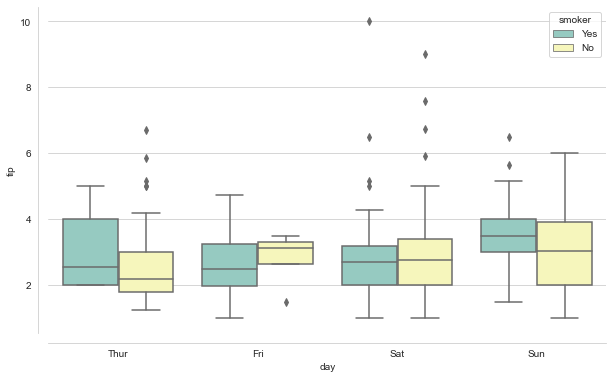

In [21]:
# y값을 tip 필드로 변경 후 비교

plt.figure(figsize=(10,6))
sns.boxplot(x='day',y='tip',hue='smoker', 
            data=tips, palette='Set3')

#offset x,y축의 간격을 설정하는 인수
sns.despine(offset=10)
plt.show()

**문제1**. 요일별 팁의 분포를 비교하는 box plot을 그리시오. 
- 파레트 Set3을 사용

**문제2**. 요일(day)별 팁(tip)의 분포를 비교하되 성별에 따라 나누어 box plot을 그리시오. 
- 파레트 Set3를 사용

**문제3**. 요일별 팁의 분포를 비교하되 성별 비교가 되도록 box plot을 그리시오. 
- 파레트 husl을 사용

**문제4**. 요일별 영수증 금액(total_bill) 분포를 비교하되 성별 비교가 되도록 box plot을 그리시오. 
- 파레트 임의로 사용

### 3) pandas의 DataFrame에 df.boxplot() 함수를 사용하여 상자 그림

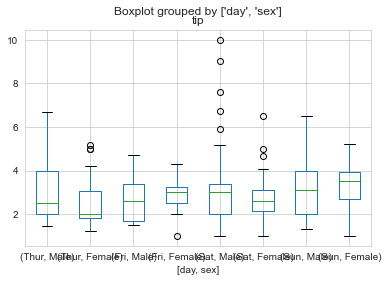

In [22]:
# Grouped boxplots by pandas

tips.boxplot(column=["tip"], by=["day", "sex"])
plt.show()

## 막대그래프(barplot) 그리기

### 1) seaborn.barplot()으로 막대 그래프 그리기

**tips 데이터**
- 요일(day)과 성별(sex)에 따라 tip의 합계 계산

In [23]:
tips_sum_by_day_sex = pd.DataFrame(tips.groupby(['day', 'sex']).tip.sum())
tips_sum_by_day_sex = tips_sum_by_day_sex.reset_index()
tips_sum_by_day_sex

,day,sex,tip
0,Thur,Male,89.41
1,Thur,Female,82.42
2,Fri,Male,26.93
3,Fri,Female,25.03
4,Sat,Male,181.95
5,Sat,Female,78.45
6,Sun,Male,186.78
7,Sun,Female,60.61


- 요일(day)과 성별(sex)에 따라 내림차순으로 정렬

In [24]:
# sort dataframe by 'day' and 'sex' in descending order first

tips_sum_by_day_sex = tips_sum_by_day_sex.sort_values(by=['day', 'sex'],
                                                      ascending=False)
tips_sum_by_day_sex

,day,sex,tip
7,Sun,Female,60.61
6,Sun,Male,186.78
5,Sat,Female,78.45
4,Sat,Male,181.95
3,Fri,Female,25.03
2,Fri,Male,26.93
1,Thur,Female,82.42
0,Thur,Male,89.41


- 요일(day) 그룹으로 tip의 누적합 계산한 변수 tip_cumsum 추가

In [25]:
# then, calculate cumulative summation by 'day' group

tips_sum_by_day_sex['tip_cumsum'] = tips_sum_by_day_sex.groupby(['day'])['tip'].cumsum(axis=0)
tips_sum_by_day_sex

,day,sex,tip,tip_cumsum
7,Sun,Female,60.61,60.61
6,Sun,Male,186.78,247.39
5,Sat,Female,78.45,78.45
4,Sat,Male,181.95,260.40
3,Fri,Female,25.03,25.03
2,Fri,Male,26.93,51.96
1,Thur,Female,82.42,82.42
0,Thur,Male,89.41,171.83


- 요일(day)과 성별(sex)에 따라 오름차순으로 정렬

In [26]:
# atfer that, sort agian by 'day' and 'sex' in ascending order

tips_sum_by_day_sex = tips_sum_by_day_sex.sort_values(by=['day', 'sex'], ascending=True)
tips_sum_by_day_sex

,day,sex,tip,tip_cumsum
0,Thur,Male,89.41,171.83
1,Thur,Female,82.42,82.42
2,Fri,Male,26.93,51.96
3,Fri,Female,25.03,25.03
4,Sat,Male,181.95,260.40
5,Sat,Female,78.45,78.45
6,Sun,Male,186.78,247.39
7,Sun,Female,60.61,60.61


- 누적 막대그래프

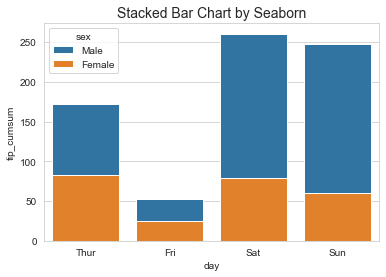

In [27]:
# Stacked Bar Chart

# dodge에 True로 하면 누적 막대그래프로 안 나오고, False로 설정해줘야 누적으로 나옴
sns.barplot(x='day', y='tip_cumsum', hue='sex',
            data=tips_sum_by_day_sex,
            dodge=False) # stacked bar chart
plt.title('Stacked Bar Chart by Seaborn', fontsize='14')
plt.show()

- 그룹 막대그래프 그리기

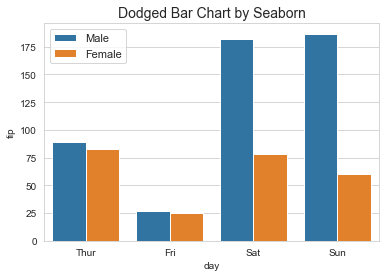

In [28]:
# Dodged Bar Chart

sns.barplot(x='day', y='tip', hue='sex', 
            data=tips_sum_by_day_sex)
# default : dodge=True
plt.title('Dodged Bar Chart by Seaborn', fontsize=14)
plt.legend(fontsize=11)
plt.show()

### 2) pandas.DataFrame.plot.bar()을 이용하여 막대그래프 그리기

- 데이터프레임 생성
    - 요일(day)에 따라 tip의 합계 계산한 데이터프레임 생성

In [29]:
# make a DataFrame

tips_sum_by_day = pd.DataFrame(tips.groupby('day').tip.sum())
tips_sum_by_day = tips_sum_by_day.reset_index()

- DataFrame.plot.bar()를 이용하여 막대그래프 그리기

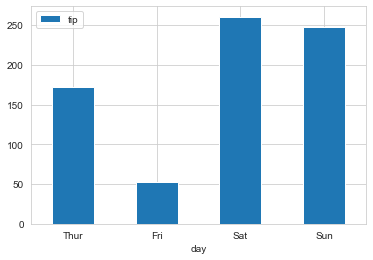

In [30]:
# basic bar chart with a single column

tips_sum_by_day.plot.bar(x='day', y='tip', rot=0)
plt.show()

- 요일(day)과 성별(sex) 그룹으로 tip의 합계를 계산한 데이터프레임 생성

In [31]:
# making a DataFrame with 'day' and 'sex' groups

tips_sum_by_day_sex = pd.DataFrame(tips.groupby(['day', 'sex']).tip.sum())
tips_sum_by_day_sex = tips_sum_by_day_sex.reset_index()

- 행은 요일, 열은 성별로 구성된 피봇테이블 생성

In [32]:
# pivot
tips_sum_by_day_sex_pivot = tips_sum_by_day_sex.pivot(index='day',
                              columns='sex', 
                              values='tip')

tips_sum_by_day_sex_pivot

sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


- 누적 막대 그래프

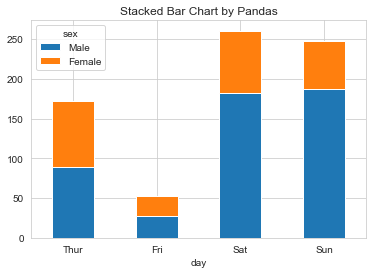

In [33]:
# Stacked Bar Chart by pandas
tips_sum_by_day_sex_pivot.plot.bar(stacked=True, rot=0)
plt.title('Stacked Bar Chart by Pandas', fontsize=12)
plt.show()

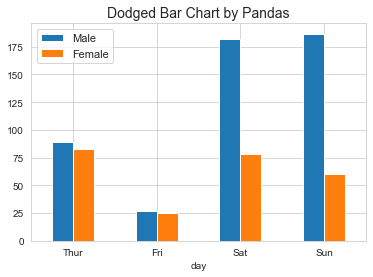

In [34]:
# Dodged Bar Chart by pandas

tips_sum_by_day_sex_pivot.plot(kind='bar', rot=0)
plt.title('Dodged Bar Chart by Pandas', fontsize=14)
plt.legend(fontsize='11')
plt.show()

## sns.swarmplot()
- 데이터의 분포를 보여주는 plot

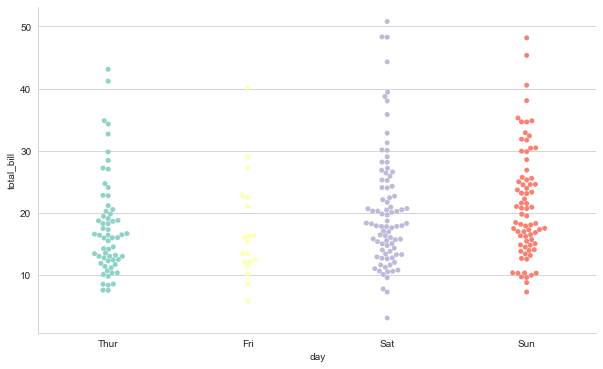

In [35]:
# seaborn.swarmplot()
plt.figure(figsize=(10,6))
sns.swarmplot(x='day',y='total_bill', data=tips, palette='Set3')
sns.despine()
plt.show()

**box plot과 swarmplot을 같이 사용**

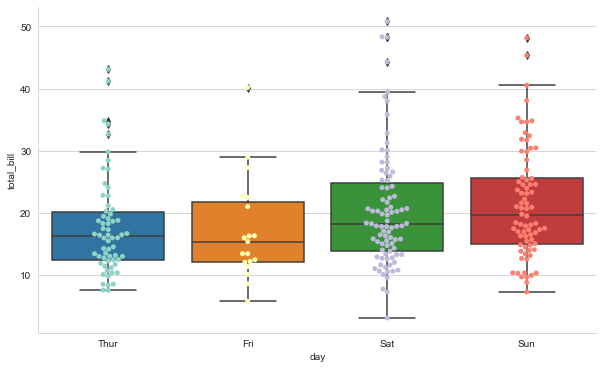

In [36]:
# box plot과 swarmplot을 같이 사용하는 예제
plt.figure(figsize=(10,6))
sns.boxplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,palette='Set3')
sns.despine()
plt.show()

## 히스토그램(histogram)

- 연속형 데이터의 분포 확인

In [37]:
iris = sns.load_dataset('iris')

In [38]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 1) matplotlib.hist()를 이용하여 히스토그램 그리기

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

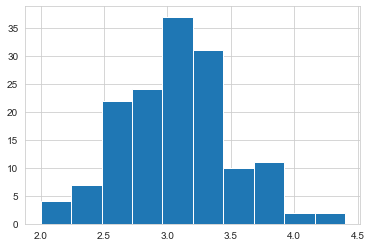

In [39]:
plt.hist(iris['sepal_width'], bins=10)

- 히스토그램의 관측치 값, bin 개수, patch 객체 반환 및 설정

[ 4.  7. 22. 24. 37. 31. 10. 11.  2.  2.] [2.   2.24 2.48 2.72 2.96 3.2  3.44 3.68 3.92 4.16 4.4 ] <BarContainer object of 10 artists>


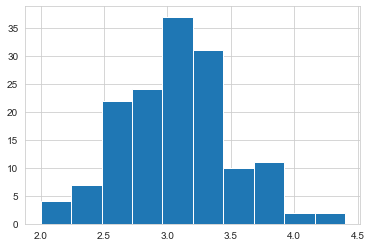

In [40]:
n, bins, patches = plt.hist(iris['sepal_width'], bins=10)
print(n, bins, patches)

- y축을 빈도수(frequency)가 아니라 density로 지정

(array([0.11111111, 0.19444444, 0.61111111, 0.66666667, 1.02777778,
        0.86111111, 0.27777778, 0.30555556, 0.05555556, 0.05555556]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

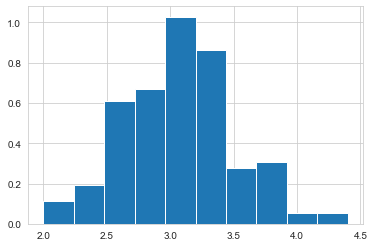

In [41]:
plt.hist(iris['sepal_width'], bins=10, density=True)

- 히스토그램의 색깔 및 투명도 지정
    - facecolor = 'blue'
    - alpha(투명도) : 0~1 사이의 값, 0에 가까워질수록 투명해짐 

(array([0.11111111, 0.19444444, 0.61111111, 0.66666667, 1.02777778,
        0.86111111, 0.27777778, 0.30555556, 0.05555556, 0.05555556]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

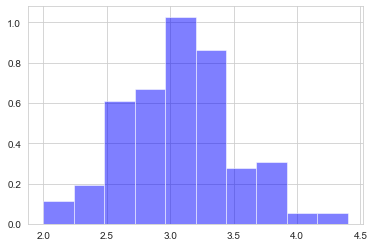

In [42]:
plt.hist(iris['sepal_width'], bins=10, 
                            density=True,
                            facecolor='blue',
                            alpha=0.5)

- 히스토그램의 제목, 축 레이블 등 지정

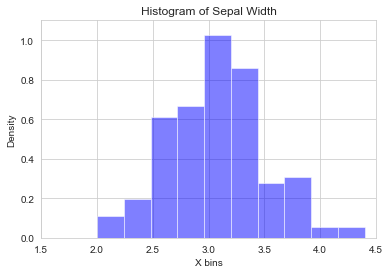

In [43]:
plt.hist(iris['sepal_width'], 
                            bins=10,
                            density=True, 
                            facecolor='blue',
                            alpha=0.5)
plt.xlabel('X bins')
plt.ylabel('Density')
plt.title('Histogram of Sepal Width')
plt.axis([1.5, 4.5, 0, 1.1])
plt.show()

### 2) seaborn 패키지의 distplot() 함수로 히스토그램 그리기
- density 기준의 히스토그램에 kernel density curve가 겹쳐져서 그래프가 그려짐

C:\Users\phi49\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


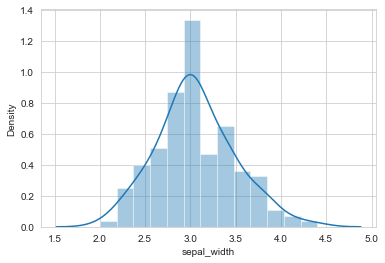

In [44]:
sns.distplot(iris['sepal_width'])
plt.show()

- sns.distplot()의 인수 사용
    - kde=True : 커널 밀도 함수 곡선 그리기 
- sns.distplot()에서 반환된 axis를 사용하여 seaborn histogram의 제목, x, y축 이름 설정

C:\Users\phi49\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


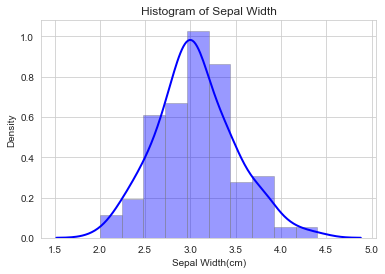

In [45]:
# Kernel Density Curve with histogram

ax = sns.distplot(iris['sepal_width'],
                      hist=True, 
                      kde=True,
                      bins=10, 
                      color='blue', 
                      hist_kws={'edgecolor': 'gray'},
                      kde_kws={'linewidth': 2})
ax.set_title('Histogram of Sepal Width')
ax.set_xlabel('Sepal Width(cm)')
ax.set_ylabel('Density')
plt.show()

### 3) pandas.DataFrame.hist()를 이용하여 히스토그램 그리기

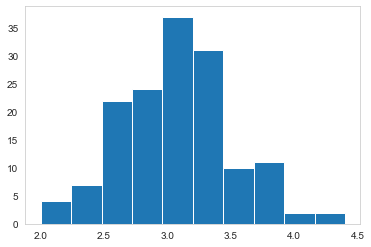

In [46]:
# Histogram by pandas.DataFrame.hist

iris['sepal_width'].hist(bins=10, grid=False)
plt.show()

## 산점도(scatter plot) 그리기

- 두 변수의 선형적 관계 시각화
- 두 변수는 수치형 데이터

**예제 데이터**
- iris dataset

In [50]:
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**예제 데이터**
- iris dataset

In [51]:
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1) maptlotlib의 plot()함수를 이용하여 산점도 그리기

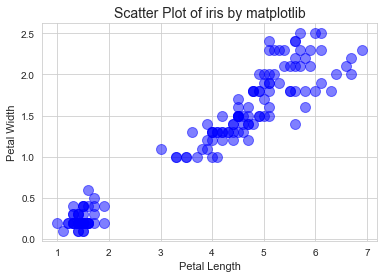

In [52]:
plt.plot('petal_length',  # x
         'petal_width',  # y 
         data=iris,
         linestyle='none', 
         marker='o',
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot of iris by matplotlib', fontsize=14)
plt.xlabel('Petal Length', fontsize=11)
plt.ylabel('Petal Width', fontsize=11)
plt.show()

#### 2) seaborn의 regplot()함수를 이용하여 산점도 그리기
- 선형회귀 적합 선을 포함시키지 않으려면 fit_reg=False

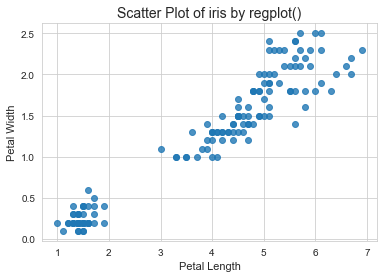

In [53]:
# Basic Scatter Plot by seaborn

sns.regplot(x=iris['petal_length'],
           y=iris['petal_width'],
           fit_reg=False) # no regression line

plt.title('Scatter Plot of iris by regplot()', fontsize=14)
plt.xlabel('Petal Length', fontsize=11)
plt.ylabel('Petal Width', fontsize=11)
plt.show()

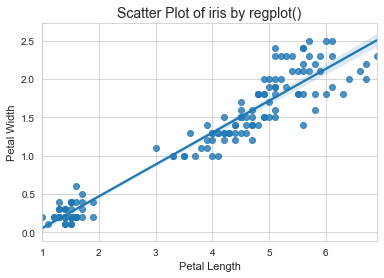

In [54]:
# Basic Scatter Plot by seaborn

sns.regplot(x=iris['petal_length'],
           y=iris['petal_width'],
           fit_reg=True) # regression line

plt.title('Scatter Plot of iris by regplot()', fontsize=14)
plt.xlabel('Petal Length', fontsize=11)
plt.ylabel('Petal Width', fontsize=11)
plt.show()

#### 3) seaborn의 scattergplot()함수를 이용하여 산점도 그리기

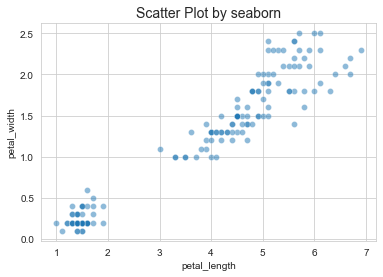

In [55]:
# scatter plot by seaborn scatterplot()

ax = sns.scatterplot(x='petal_length', 
                     y='petal_width', 
                     alpha=0.5,
                     data=iris)
plt.title('Scatter Plot by seaborn', fontsize=14)
plt.show()

#### 4) pandas의 plot.scatter()함수를 이용하여 산점도 그리기

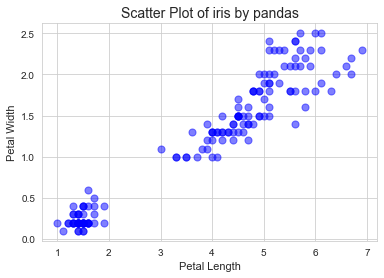

In [56]:
# plot.scatter() by pandas
iris.plot.scatter(x='petal_length',
                  y='petal_width',
                  s=50, # marker size
                  c='blue',
                  alpha=0.5)
plt.title('Scatter Plot of iris by pandas', fontsize=14)
plt.xlabel('Petal Length', fontsize=11)
plt.ylabel('Petal Width', fontsize=11)
plt.show()

## 산점도 행렬(scatter plot matrix) 그리기

- 여러 개의 연속형 변수에 대해서 두 변수씩 쌍을 이루는 산점도를 그려 한꺼번에 변수 간 관계를 일목요연하게 볼 수 있음

#### 1) seaborn.pairplot()을 이용한 산점도 행렬

- 대각원소 자리에는 diag_kind='hist' 를 설정하여 각 변수별 히스토그램 그림

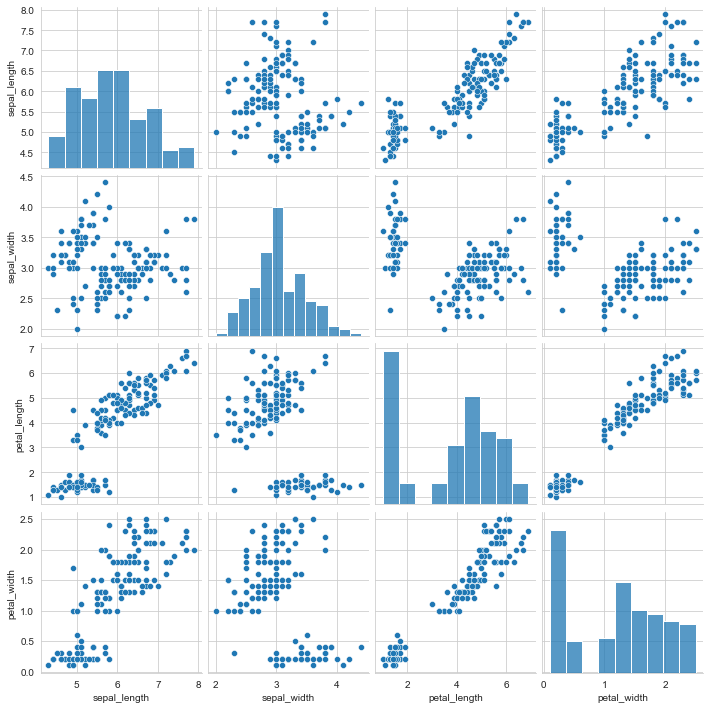

In [57]:
# scatterplot matrix with histogram only for continuous variables

sns.pairplot(iris, diag_kind='hist')
plt.show()

#### 2) seaborn.pairplot()의 인수를 이용한 산점도 행렬2
- diag_kind='kde' : 각 변수별 커널밀도추정곡선 그림
- hue='species' : 'species' 종(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
- 색깔은 palette 에 'bright', 'pastel', 'deep', 'muted', 'colorblind', 'dark' 중에서 가독성이 좋고 선호하는 색상으로 선택 

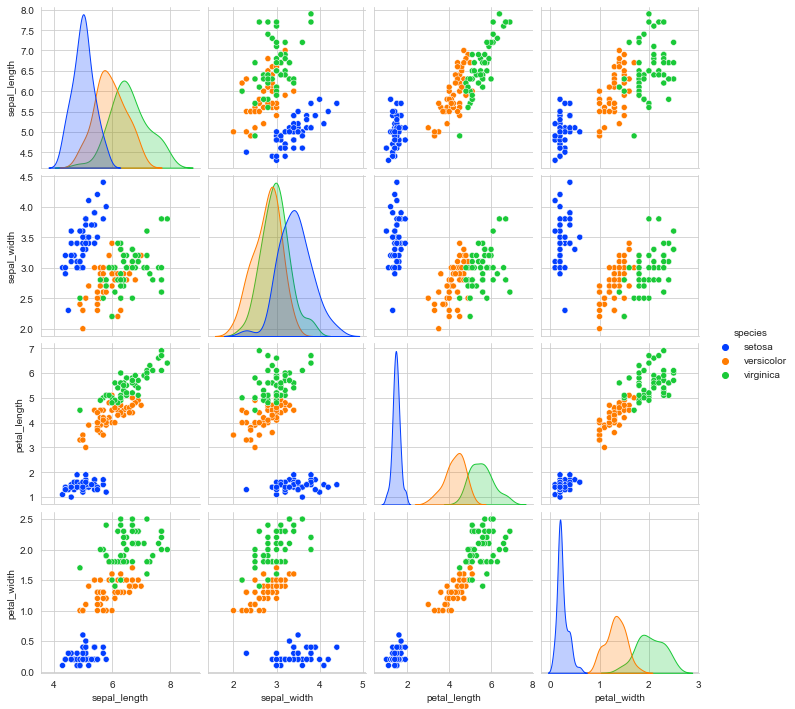

In [58]:
# Scatterplot matrix with different color by group and kde

sns.pairplot(iris, 
             diag_kind='kde',
             hue="species", 
             palette='bright') # pastel, bright, deep, muted, colorblind, dark
plt.show()

#### 3) pandas.plotting 의 scatter_matrix() 함수를 사용하여 산점도 행렬

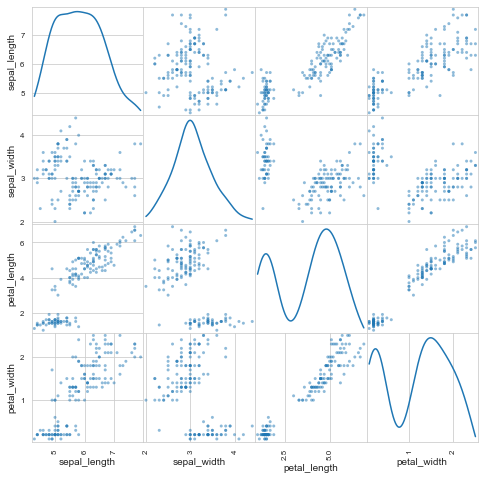

In [49]:
# scatterplot matrix by pandas scatter_matrix()

from pandas.plotting import scatter_matrix

scatter_matrix(iris, 
               alpha=0.5, 
               figsize=(8, 8), 
               diagonal='kde')

plt.show()

## sns.heatmap()

- X축과 Y축에 2개의 범주형 자료의 계급(class)별로 연속형 자료를 집계한 자료 시각화
- 집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화

**예제 데이터**
- 정규난수 데이터 : 2차원 배열 형식

In [59]:
# heatmap 예제 : 랜덤 데이터 생성
uniform_data = np.random.rand(10,12)
uniform_data

array([[8.18876137e-05, 9.80597342e-01, 8.82712985e-01, 9.19472466e-01,
        4.15503551e-01, 7.44615462e-01, 2.12831499e-01, 3.92304071e-01,
        8.51548051e-01, 1.27612224e-01, 8.93865368e-01, 4.96507972e-01],
       [4.26095655e-01, 3.05646388e-01, 9.16848785e-01, 5.17623461e-01,
        8.04026368e-01, 8.57651787e-01, 9.22382355e-01, 3.03380734e-01,
        3.39810854e-01, 5.95073876e-01, 4.41324135e-01, 9.32842533e-01],
       [3.97564052e-01, 4.77778048e-01, 6.17186089e-01, 4.04739486e-01,
        9.92478436e-01, 9.88512846e-02, 2.20603318e-01, 3.22655131e-01,
        1.47722844e-01, 2.84219235e-01, 7.79245293e-01, 5.22892001e-01],
       [3.39536361e-02, 9.82622585e-01, 6.16006478e-01, 5.89394786e-02,
        6.61168772e-01, 3.78369371e-01, 1.35673297e-01, 5.63664593e-01,
        7.27079951e-01, 6.71126604e-01, 2.47513154e-01, 5.24866221e-01],
       [5.37663444e-01, 7.16803364e-01, 3.59867349e-01, 7.97732595e-01,
        6.27921849e-01, 3.83316070e-02, 5.46479022e-01, 8.61

**heatmap 그리기**

<AxesSubplot:>

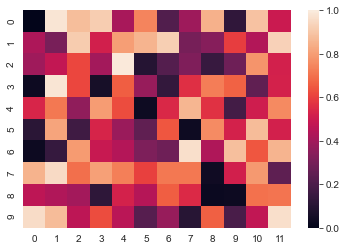

In [60]:
# 색상 스케일 최소값, 최대값 (vmin=0, vmax=1) 적용
sns.heatmap(uniform_data, vmin=0, vmax=1) 

**sns 패키지의 flights data set을 이용해서 heatmap 작성**

In [61]:
# sns 패키지의 filghts data set 을 이용해서 heatmap 작성
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


**heatmap을 그리기 위한 데이터 테이블 생성**
- pivot 테이블을 이용해서 연도별 각 월 승객수로 구조를 변환

In [62]:
# 피봇 테이블 사용 문법 1(간단한 표현)
# 데이터프레임.pivot(인덱스, 컬럼, 계산필드)
flight_p=flights.pivot('month','year','passengers')
flight_p

# 피봇 테이블 사용 문법 2
# flight_p2 =pd.pivot_table(flights,index=['month'],
#                          columns=['year'],
#                          values=['passengers'],
#                          aggfunc=[np.mean],
#                          fill_value=0)
# flight_p2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


**seaborn.heatmap() 그리기**

C:\Users\phi49\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phi49\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phi49\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phi49\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phi49\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phi49\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44061 missing from c

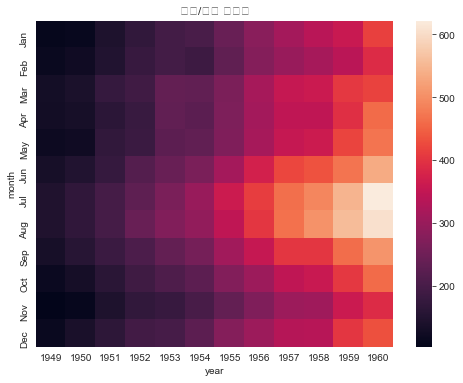

In [63]:
# sns.heatmap(2차원데이터)
plt.figure(figsize=(8,6))
sns.heatmap(flight_p)
plt.title('연도/월별 승객수')
plt.show()

**heatmap()의 annot, fmt 인수를 사용**
- annot=True : 각 셀에 숫자를 입력(annotate each cell with numeric value)
- fmt='d' : 정수 형태(integer format)로 숫자를 입력

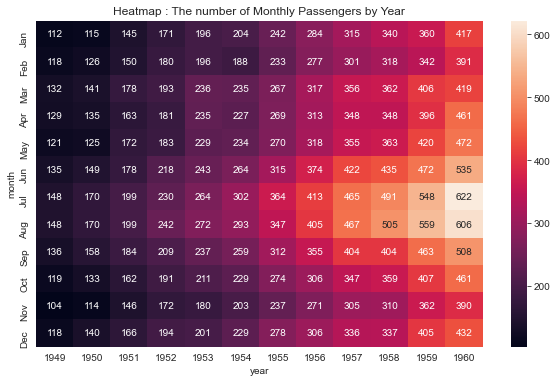

In [64]:
# 히트맵 그래프 위에 실제 데이터 출력
# 사용 인수 : annot=True, fmt=d/f - 출력데이터 형태

plt.figure(figsize=(10,6))
sns.heatmap(flight_p, annot=True, fmt='d')
plt.title('Heatmap : The number of Monthly Passengers by Year')
plt.show()

**matplotlib의 pcolor()를 이용한 heatmap 그리기**

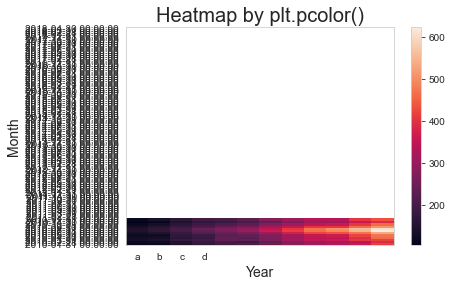

In [65]:
# heatmap by plt.pcolor()
plt.pcolor(flight_p)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()
plt.show()

**heatmap의 cmap인수를 이용하여 다른 color map 지정**
- color maps in Matplotlib 링크 참고: 
    - https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

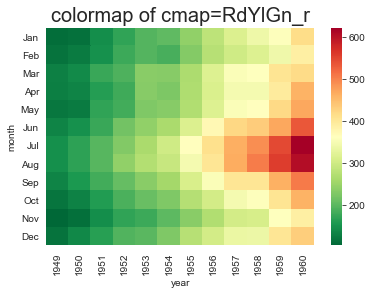

In [66]:
# different colormap
sns.heatmap(flight_p, cmap='RdYlGn_r')
plt.title('colormap of cmap=RdYlGn_r', fontsize=20)
plt.show()

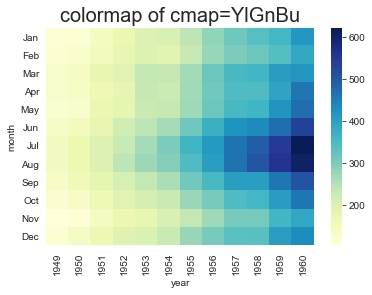

In [67]:
# different colormap2
sns.heatmap(flight_p, cmap='YlGnBu')
plt.title('colormap of cmap=YlGnBu', fontsize=20)
plt.show()

In [68]:
flight_p.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=False, name='month', dtype='category')

In [69]:
flight_p.columns

Int64Index([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960],
           dtype='int64', name='year')

**color map의 중심을 1949년 1월(January)로 맞추어서 히트맵 그리기**
- 좌측 최상단이 1949년 1월(1949 January)로서 히트맵 색의 중심 위치가 됨 

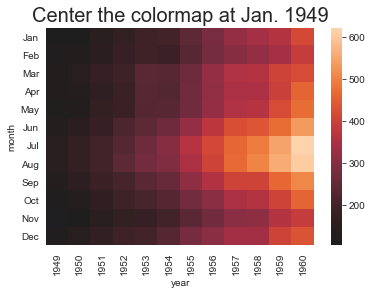

In [70]:
# center the colormap at a specific value
sns.heatmap(flight_p, center=flight_p.loc['Jan', 1949])
plt.title('Center the colormap at Jan. 1949', fontsize=20)
plt.show()